In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
data = pd.read_csv('Data/mesa_data.csv')
data.head()

,Unnamed: 0,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,...,E_0_36,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname
0,0,profile4,152.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,...,0.000006,0.000002,0.000001,7.889056e-07,6.149682e-07,15247.850269,2037.139686,0.029961,38796.631185,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
1,1,profile5,153.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,...,0.000008,0.000002,0.000001,8.212464e-07,6.273383e-07,14809.891105,1980.528826,0.029540,37900.327592,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
2,2,profile6,154.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,...,0.000013,0.000003,0.000001,8.515127e-07,6.398741e-07,14496.838617,1940.585790,0.029221,37222.634389,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
3,3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,...,0.000018,0.000003,0.000001,8.790797e-07,6.513090e-07,14220.559706,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
4,4,profile8,156.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,...,0.000027,0.000003,0.000001,9.036751e-07,6.612813e-07,14054.932771,1883.449431,0.028860,36302.082709,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1


In [15]:
[n for n in data.columns]

['Unnamed: 0',
 'filename',
 'model_number',
 'evol_stage',
 'initial_mass',
 'initial_Yinit',
 'initial_Zinit',
 'initial_feh',
 'initial_MLT',
 'initial_fov',
 'star_mass',
 'star_age',
 'ms_age',
 'frac_age',
 'effective_T',
 'luminosity',
 'radius',
 'log_g',
 'surface_h1',
 'surface_he4',
 'surface_Z',
 'star_feh',
 'center_h1',
 'center_he4',
 'log_center_T',
 'log_center_Rho',
 'he_core_mass',
 'delta_nu',
 'delta_Pg',
 'nu_max',
 'acoustic_cutoff',
 'nu_0_1',
 'nu_0_2',
 'nu_0_3',
 'nu_0_4',
 'nu_0_5',
 'nu_0_6',
 'nu_0_7',
 'nu_0_8',
 'nu_0_9',
 'nu_0_10',
 'nu_0_11',
 'nu_0_12',
 'nu_0_13',
 'nu_0_14',
 'nu_0_15',
 'nu_0_16',
 'nu_0_17',
 'nu_0_18',
 'nu_0_19',
 'nu_0_20',
 'nu_0_21',
 'nu_0_22',
 'nu_0_23',
 'nu_0_24',
 'nu_0_25',
 'nu_0_26',
 'nu_0_27',
 'nu_0_28',
 'nu_0_29',
 'nu_0_30',
 'nu_0_31',
 'nu_0_32',
 'nu_0_33',
 'nu_0_34',
 'nu_0_35',
 'nu_0_36',
 'nu_0_37',
 'nu_0_38',
 'nu_0_39',
 'nu_0_40',
 'E_0_1',
 'E_0_2',
 'E_0_3',
 'E_0_4',
 'E_0_5',
 'E_0_6',
 'E_0_7'

In [301]:
len(data)
data = data[data.star_age > 0.2]
data = data[data.effective_T < 6800]
len(data)

151052

In [302]:
icols = ['initial_mass',
 'initial_Yinit',
 'initial_Zinit',
 'initial_feh',
 'initial_MLT',
 'frac_age']

ocols = ['effective_T',
 'luminosity',
 'radius',
 'delta_nu',
 'nu_max',
 'surface_he4']

fcols = [f'nu_0_{n}' for n in range(12, 27)]

cols = fcols + icols # + icols

df = data[cols]

In [303]:
from sklearn.decomposition import PCA

In [304]:
pca = PCA(n_components=7)
X_r = pca.fit_transform(df.values)
np.sum(pca.explained_variance_ratio_)

0.9999999786174343

In [305]:
print(pca.explained_variance_ratio_)

[9.99993389e-01 5.69277263e-06 6.20013770e-07 1.48053669e-07
 6.73611968e-08 4.59172120e-08 1.50004407e-08]


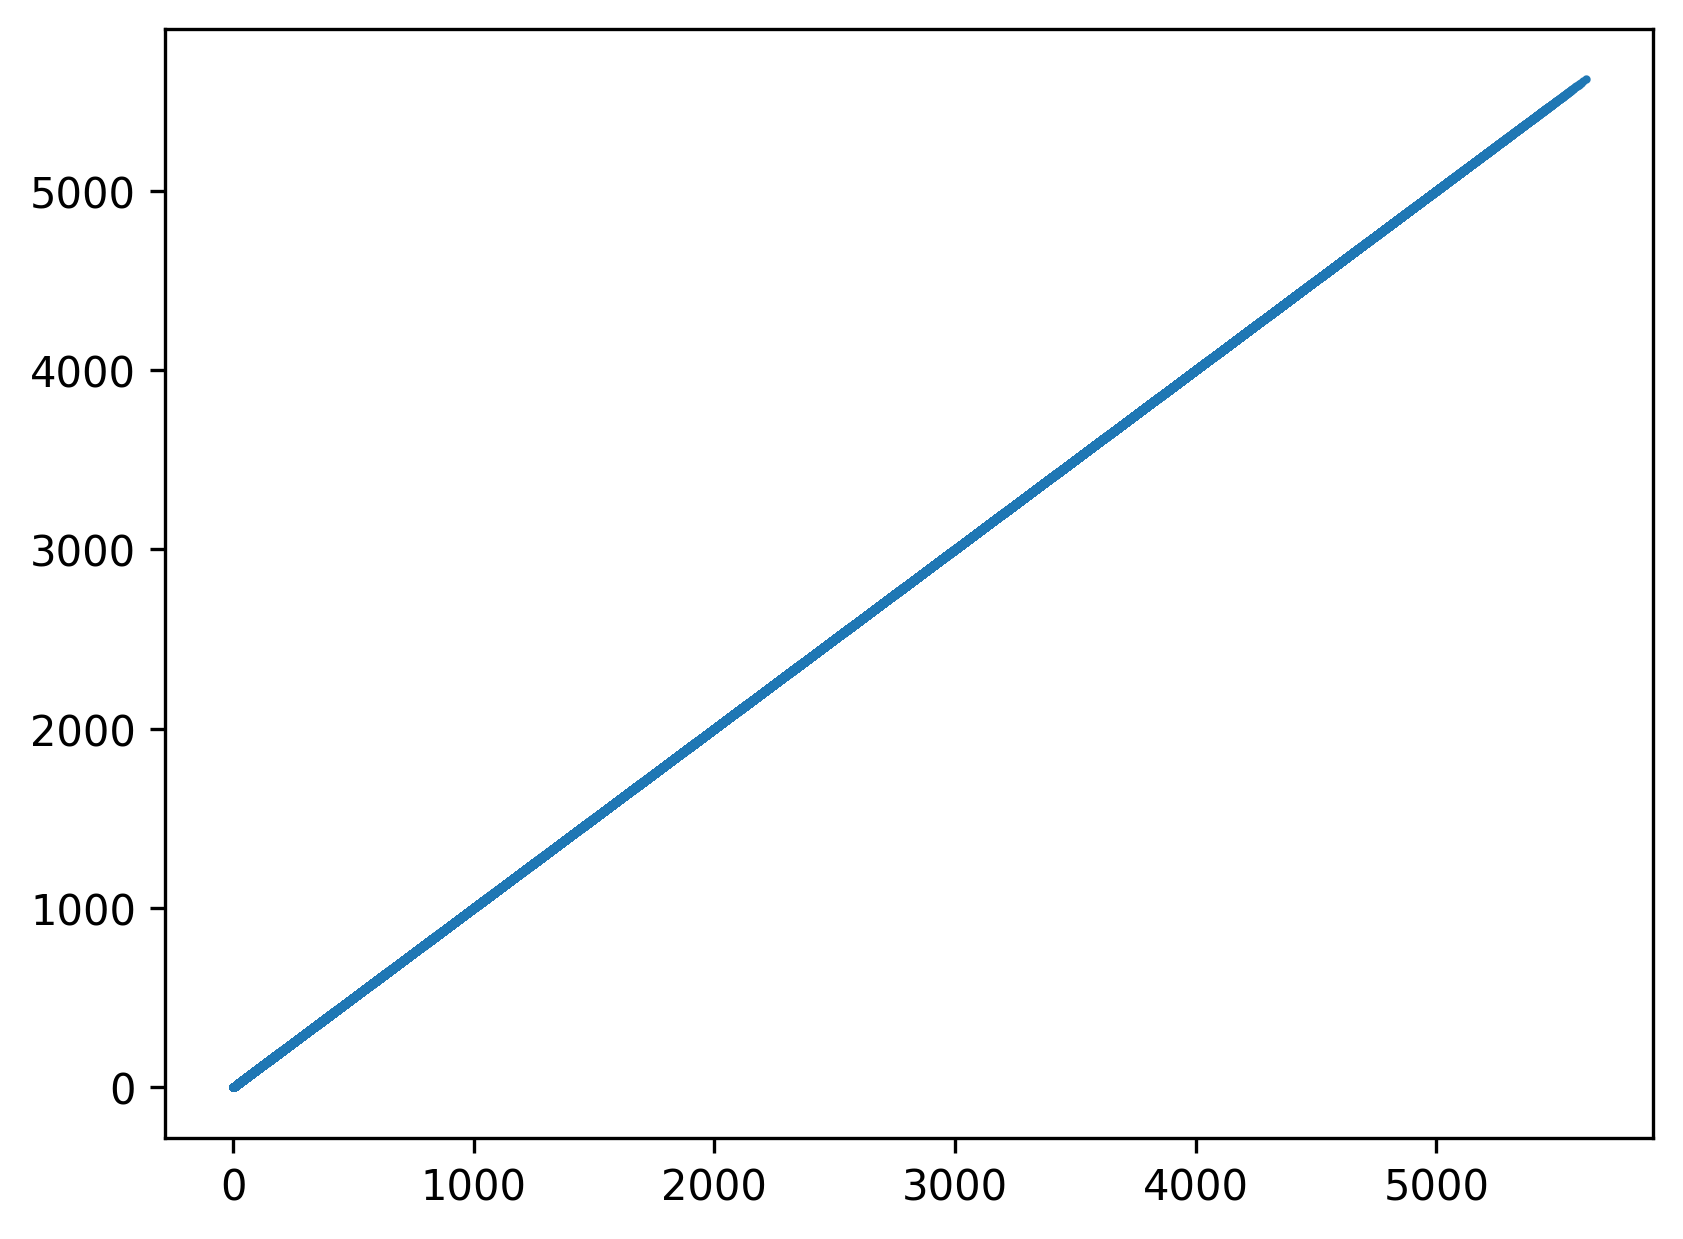

In [306]:
X_dash = pca.inverse_transform(X_r)
rec = pd.DataFrame(data=X_dash, columns=cols)

fig, ax = plt.subplots(dpi=300)

ax.scatter(df.values, X_dash, s=1)

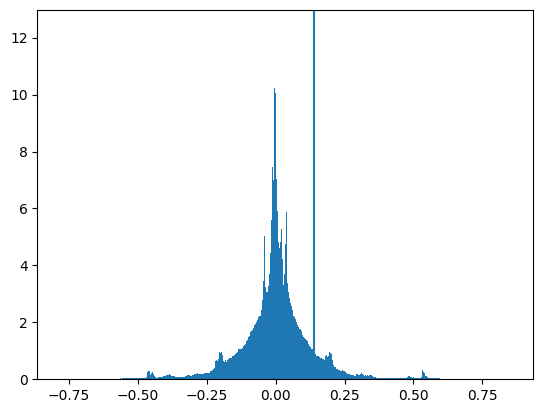

In [307]:
fig, ax = plt.subplots()
_ = ax.hist(df.values.flatten() - X_dash.flatten(), bins=1000, density=True)
ax.axvline(np.std(df.values.flatten() - X_dash.flatten()))

nu_0_12    1884.381816
nu_0_13    2024.261603
nu_0_14    2164.230857
nu_0_15    2302.909278
nu_0_16    2440.639166
nu_0_17    2578.983403
nu_0_18    2718.135001
nu_0_19    2857.313085
nu_0_20    2996.814013
nu_0_21    3136.824770
nu_0_22    3276.976122
nu_0_23    3417.465627
nu_0_24    3558.709855
nu_0_25    3700.221235
nu_0_26    3841.723750
Name: 3236, dtype: float64
139.92452056831155


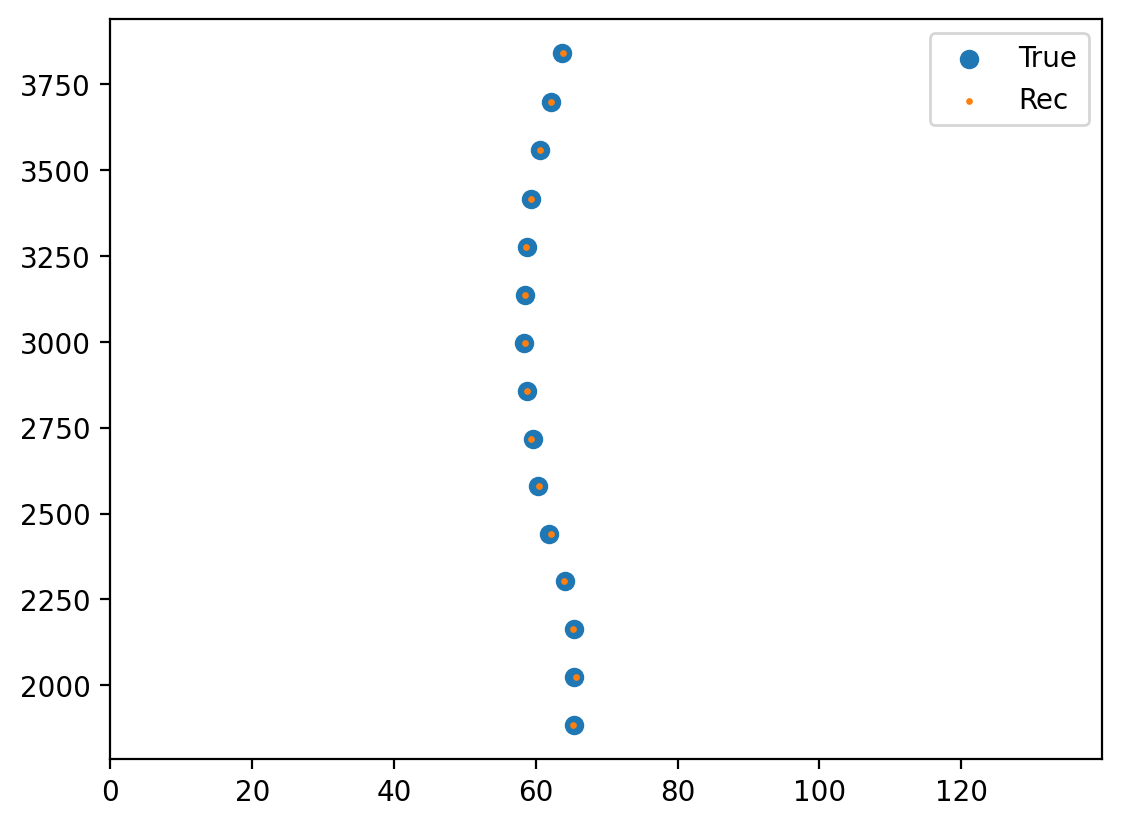

In [308]:
fig, ax = plt.subplots(dpi=200)

idx = 2004
f_true = df.iloc[idx][fcols]
print(f_true)
dnu =np.abs(np.median(np.diff(f_true)))
print(dnu)
ax.scatter(f_true % dnu, f_true, label='True')

f_rec = rec.iloc[idx][fcols]

ax.scatter(f_rec % dnu, f_rec, label='Rec', s=2)
ax.set_xlim([0, dnu])
ax.legend()

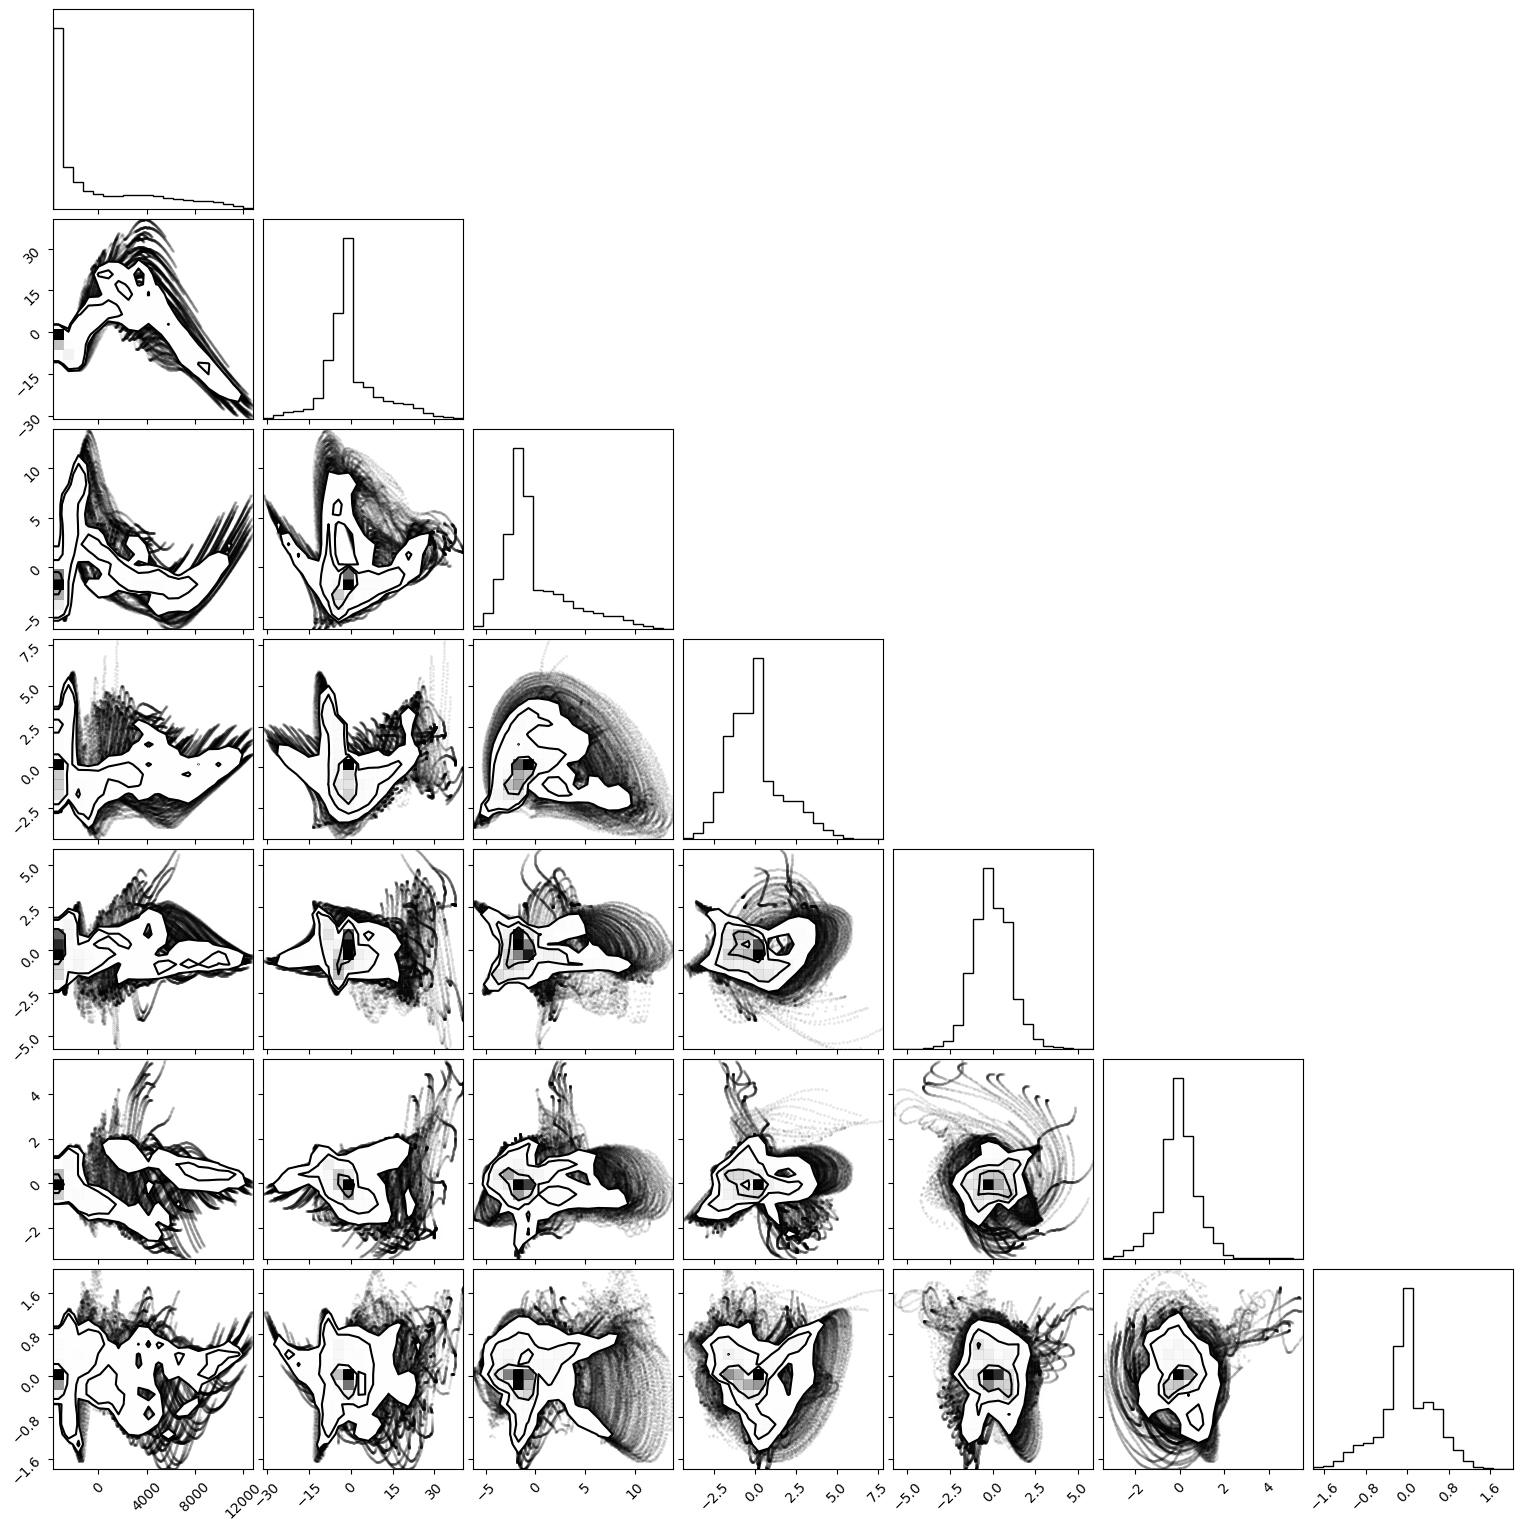

In [309]:
import corner

corner.corner(X_r);